In [1]:
import sys 
sys.path.append('../')

import scipy
import numpy as np
import matplotlib.pyplot as plt
from dataset import numerical_kernel
from utils import *
from mlmm import * 
import torch
import numpy as np
from dataset import load_dataset_1d

Logarithm & Cosine Kernel Dataset Generation

In [2]:
## create logarithm kernel dataset
# raw_data = scipy.io.loadmat('../../pde_data/green_learning/data1d_8193/laplace.mat')
# raw_data['ExactGreen'] = np.array(['np.nan_to_num(np.log(np.abs(x-y)), neginf=-100)'])
# F = raw_data['F']
# U_hom = raw_data['U_hom']
# X, Y = raw_data['X'], raw_data['Y']
# x, y = np.meshgrid(X, Y)
# K = eval(raw_data['ExactGreen'][0]).T
# h = X[1] - X[0]
# U = h * K @ F
# raw_data['U'] = U 
# scipy.io.savemat('../../pde_data/green_learning/data1d_8193/logarithm.mat', raw_data)

In [3]:
## create cosine kernel dataset
# raw_data = scipy.io.loadmat('../../pde_data/green_learning/data1d_8193/laplace.mat')
# raw_data['ExactGreen'] = np.array(['np.cos(x-y)'])
# F = raw_data['F']
# U_hom = raw_data['U_hom']
# X, Y = raw_data['X'], raw_data['Y']
# x, y = np.meshgrid(X, Y)
# K = eval(raw_data['ExactGreen'][0]).T
# h = X[1] - X[0]
# U = h * K @ F
# raw_data['U'] = U 
# scipy.io.savemat('../../pde_data/green_learning/data1d_8193/cosine.mat', raw_data)

Other Dataset Sanity Check

In [43]:
raw_data = scipy.io.loadmat('../../pde_data/green_learning/data1d_8193/viscous_shock.mat')
F = raw_data['F'] 
U = raw_data['U']
U_hom = raw_data['U_hom']
X, Y = raw_data['X'], raw_data['Y']
x, y = np.meshgrid(X, Y)
K = eval(raw_data['ExactGreen'][0]).T
h = X[1] - X[0]
U_ = h * K @ F + U_hom

KeyError: 'ExactGreen'

DataLoader Check

<string>:1: RuntimeWarning: divide by zero encountered in log


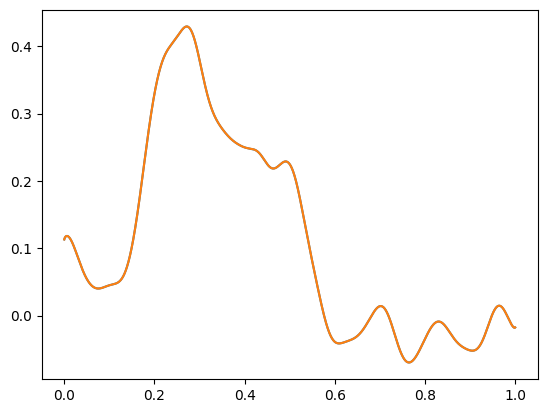

In [23]:
data_root = '../../pde_data/green_learning/data1d_8193/'
kernel = 'logarithm'
train_loader, test_loader, Khh, w_hom, xh, grid_pts, h = load_dataset_1d(kernel, data_root, bsz=128)
uh, wh = next(iter(train_loader))
wh_ = multi_summation(Khh, uh[[0]], h)
plt.plot(xh, wh[0,0])
plt.plot(xh, wh_[0,0])

In [36]:
l = 13 # number of level, total number of points is 2^l-1
k = 8 # number of corase level
m = 7 # local range for correction
order = 2 # order of interpolation/restriction

wh_smooth_ml, KHH = SmoothKernelMLMM_full(uh, Khh, h, k, order)
l1 = l1_norm(wh_smooth_ml[-1], wh)
rl2 = rl2_error(wh_smooth_ml[-1], wh)
print("{:}-smooth : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))
wh_singular_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)
# wh_ml, KHH = SingularSmoothKernelMLMM_full(uh, Khh, h, k, order)
l1 = l1_norm(wh_smooth_ml[-1], wh)
rl2 = rl2_error(wh_singular_ml[-1], wh)
print("{:}-singular : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))

logarithm-smooth : L1 - 1.13e+00, rL2 - 6.59e+00
logarithm-singular : L1 - 1.13e+00, rL2 - 8.23e-02
